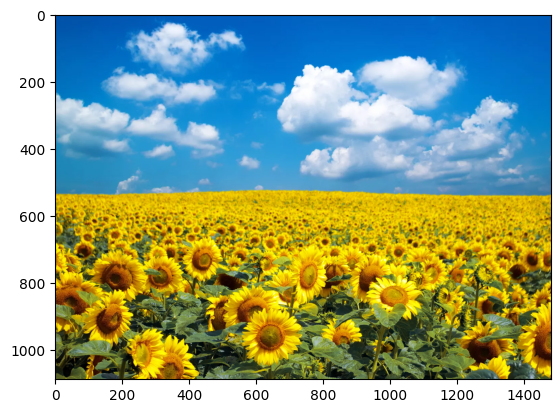

In [153]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import an image
img = cv2.imread("C:\\Users\\18454\\Downloads\\Input.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Let's do the conversion in imshow
plt.imshow(img)


Let's analyze the full image's HSV histogram.

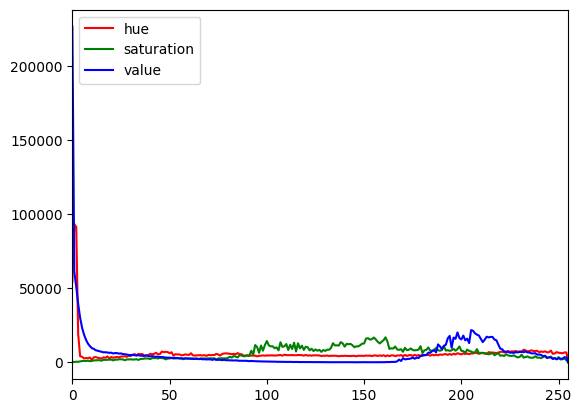

In [154]:
# Convert to HSV

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

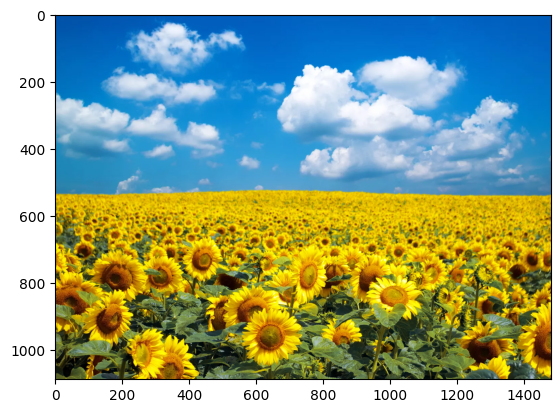

In [155]:
# Import the face image.
img = cv2.imread('C:\\Users\\18454\\Downloads\\Input.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image.
plt.imshow(img)

### Create Masks and Bounding Boxes on the Image.

This allows us to analyze specific portions of the image.  We will draw a rectangle and circle on the image.  Then we will use the rectangle coordinates to create a mask on our image.  Using this mask we can analyze the histogram of this region.

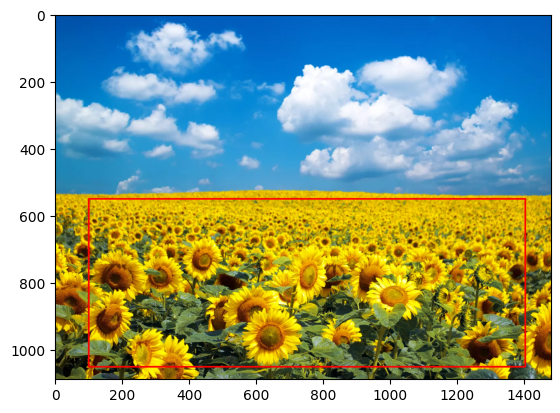

In [156]:
# Rectangle OpenCv function
# cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Top left corner of rectangle
top_left = (100,550)

# Bottom right corner of rectangle
bottom_right = (1400,1050)

# Color
rect_color = (255,0,0)

# Thickness
thickness = 3

# Rectangle function
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Plot image
plt.imshow(img_rect)

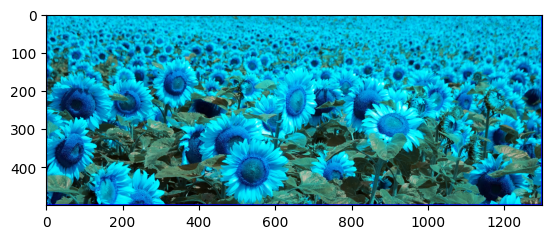

In [157]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_masked = img[ 550:1050,100:1400]
plt.imshow(img_masked)

# CREATE A MASK!

First let's using Python array slicing to crop out a portion of our image. 

In [158]:
# Paste the rectangle coordinates so you can reference them.

# Top left corner of rectangle
# top_left = (45,25)

# Bottom right corner of rectangle
# bottom_right = (150,175)

# Import the face image.
img = cv2.imread('C:\\Users\\18454\\Downloads\\Input.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


Let's create a mask using a separate array that is a binary image.  Each pixel is either 0 or 255. 

In [159]:
#Create an empty 2D array filled with zeros the same shape as our image.  Notice we are defining the data type as uint8 now!
mask = np.zeros(img.shape[:2], np.uint8) 

# Set the masked to white. Remember black is 0 and white is 255 is 8 bit color.

mask[550:1050,100:1400] = 255

# Image shape to confirm it's the same size as our image.
print(mask.shape)

(1087, 1480)


(1087, 1480)


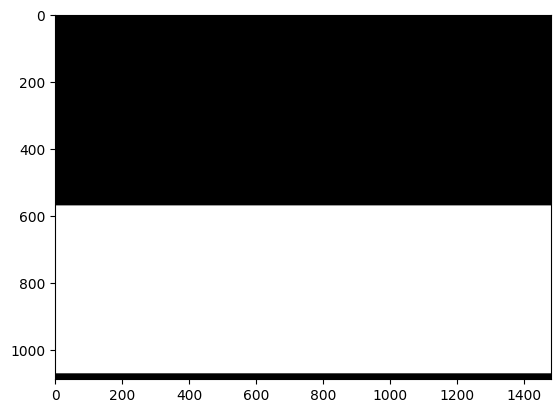

In [160]:
mask = np.zeros(img.shape[:2], np.uint8) 
mask[ 570:1070,0:1500] = 255
print(mask.shape)
plt.imshow(mask, cmap="gray")

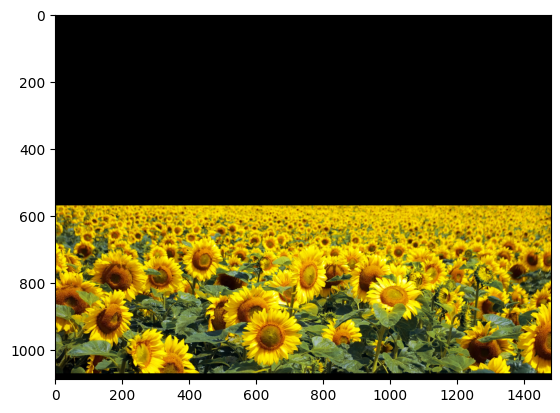

In [161]:
img = cv2.imread('C:\\Users\\18454\\Downloads\\Input.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(img_masked)

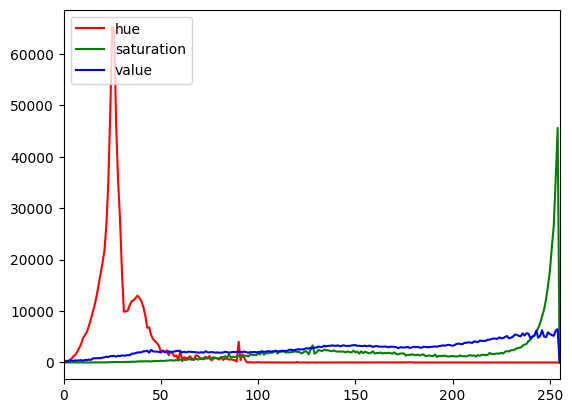

In [162]:
# Create a histogram of HSV values.
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()